In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib


In [13]:
df=pd.read_csv("predictive_maintenance.csv")

In [14]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [16]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [17]:
df["Failure Type"].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [18]:
df["Failure Binary"] = df["Failure Type"].apply(lambda x: 0 if x == "No Failure" else 1)


In [19]:
df[["Failure Type","Failure Binary"]].head()


,Failure Type,Failure Binary
0,No Failure,0
1,No Failure,0
2,No Failure,0
3,No Failure,0
4,No Failure,0


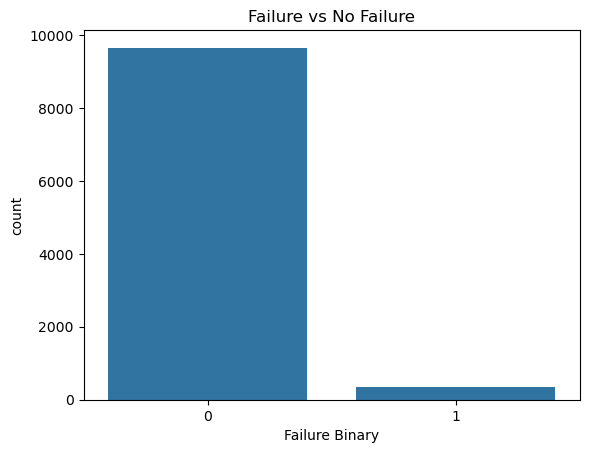

In [20]:
sns.countplot(x="Failure Binary", data=df)
plt.title("Failure vs No Failure")
plt.show()


In [21]:
le=LabelEncoder()
df["Target"]=le.fit_transform(df["Failure Type"])


In [22]:
df[["Failure Type", "Target"]].drop_duplicates()

,Failure Type,Target
0,No Failure,1
50,Power Failure,3
77,Tool Wear Failure,5
160,Overstrain Failure,2
1221,Random Failures,4
3236,Heat Dissipation Failure,0


In [23]:
X = df.drop(["UDI", "Product ID", "Failure Type", "Failure Binary", "Target"], axis=1)



In [24]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9


In [25]:
le_type = LabelEncoder()
X["Type"] = le_type.fit_transform(X["Type"])


In [26]:
print(X["Type"].unique())


[2 1 0]


In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [28]:
X.dtypes


Type                         int64
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
dtype: object

In [29]:
y_binary = df["Failure Binary"]


In [30]:
print(y_binary.value_counts())
print(type(y_binary))


Failure Binary
0    9652
1     348
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


In [31]:
## Model train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_binary, test_size=0.2, random_state=42)


In [32]:
##Mdel Training
model_binary=RandomForestClassifier()
model_binary.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
y_pred_bin = model_binary.predict(X_test)

print("Binary Classification Report:")
print(classification_report(y_test, y_pred_bin))




Binary Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1935
           1       0.82      0.57      0.67        65

    accuracy                           0.98      2000
   macro avg       0.90      0.78      0.83      2000
weighted avg       0.98      0.98      0.98      2000



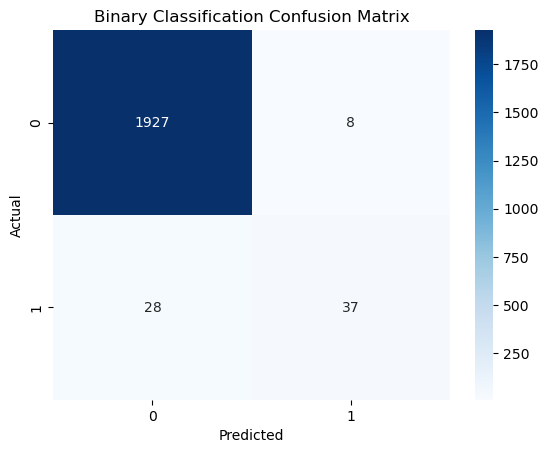

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Binary Classification Confusion Matrix")
plt.show()

In [35]:
df_failures = df[df["Failure Binary"] == 1]

X_fail = df_failures.drop(["UDI", "Product ID", "Failure Type", "Failure Binary", "Target"], axis=1)
X_fail["Type"] = le_type.transform(X_fail["Type"])
X_fail_scaled = scaler.transform(X_fail)

y_fail = df_failures["Target"]


In [36]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    X_fail_scaled, y_fail, test_size=0.2, random_state=42
)

model_multi = RandomForestClassifier()
model_multi.fit(Xf_train, yf_train)


RandomForestClassifier()

In [37]:
yf_pred = model_multi.predict(Xf_test)

print("Multi-Class Classification Report:")
print(classification_report(yf_test, yf_pred))



Multi-Class Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           2       0.80      1.00      0.89        16
           3       0.90      0.86      0.88        21
           4       0.00      0.00      0.00         2
           5       0.88      0.88      0.88         8

    accuracy                           0.90        70
   macro avg       0.72      0.74      0.72        70
weighted avg       0.88      0.90      0.89        70



C:\Users\athar\anaconda distribution installer\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\athar\anaconda distribution installer\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\athar\anaconda distribution installer\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

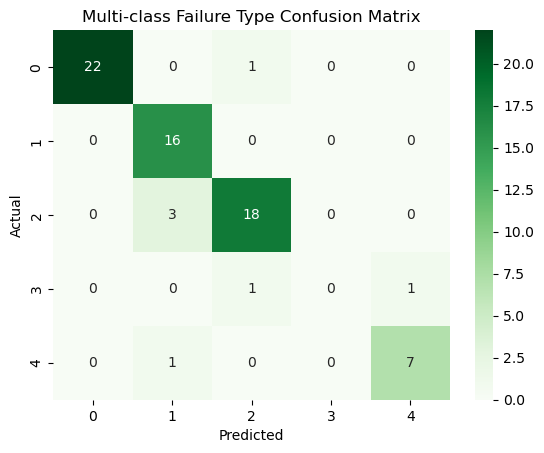

In [38]:

sns.heatmap(confusion_matrix(yf_test, yf_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Multi-class Failure Type Confusion Matrix")
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder

le_target = LabelEncoder()
df["target"] = le_target.fit_transform(df["Failure Type"])


In [55]:
##  Combine both models in one function
def predict_failure(input_row):
    row_scaled = scaler.transform(input_row)  # input_row should be a DataFrame
    will_fail = model_binary.predict(row_scaled)

    if will_fail[0] == 0:
        return "No Failure"
    else:
        fail_type = model_multi.predict(row_scaled)
        return le_target.inverse_transform(fail_type)[0]



In [61]:
sample = X.iloc[160:161]  # keep as DataFrame
predict_failure(sample)




'Overstrain Failure'

In [62]:
import joblib

joblib.dump(model_binary, "model_binary.pkl")
joblib.dump(model_multi, "model_multi.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le_type, "label_encoder_type.pkl")
joblib.dump(le_target, "label_encoder_target.pkl")



['label_encoder_target.pkl']